In [1]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#read the dataset
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
#find missing values in dataset
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [4]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [5]:
#different class label values
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

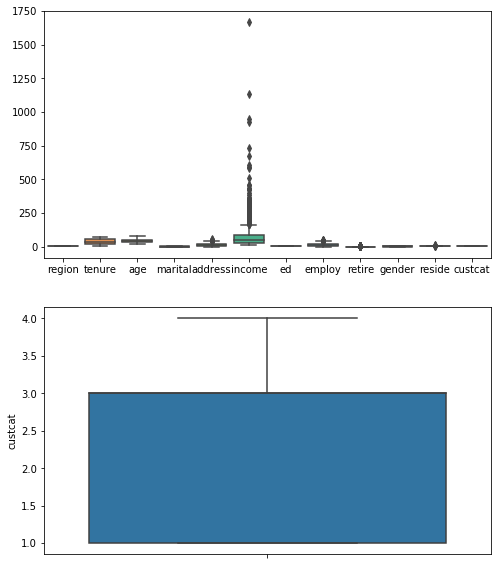

In [6]:
#Distribution of data
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(8,10)
sn.boxplot(data=df,orient="v",ax=axes[0])
sn.boxplot(data=df,y="custcat",ax=axes[1])

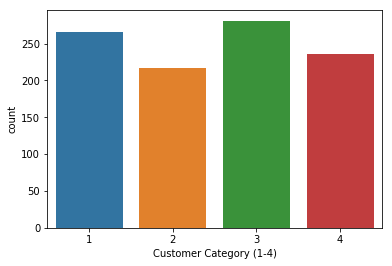

In [7]:
#distribution of class label
#1- Basic Service 2- E-Service 3- Plus Service 4- Total Service
sn.countplot(x="custcat", data=df)
plt.xlabel("Customer Category (1-4)")
plt.show()

In [8]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X=df.iloc[:, :-1].values
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [9]:
y=df.iloc[:, 11].values
y

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2, 1, 3, 1, 4, 1, 2, 3, 3, 1, 4, 2, 1,
       4, 1, 3, 3, 4, 3, 1, 2, 2, 4, 3, 2, 4, 2, 4, 3, 3, 3, 3, 3, 1, 4,
       3, 2, 2, 4, 1, 3, 1, 2, 4, 1, 1, 1, 2, 1, 3, 2, 3, 4, 1, 4, 4, 1,
       3, 3, 1, 1, 1, 2, 1, 2, 3, 1, 3, 1, 3, 4, 4, 1, 4, 3, 2, 1, 2, 4,
       4, 3, 2, 1, 2, 4, 1, 4, 3, 2, 3, 2, 4, 3, 3, 2, 2, 2, 1, 4, 1, 2,
       2, 2, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 2, 4, 2, 2, 4, 3, 1,
       4, 2, 3, 1, 1, 3, 3, 4, 4, 3, 4, 2, 3, 1, 4, 2, 2, 2, 1, 3, 4, 4,
       4, 3, 1, 1, 2, 3, 3, 3, 1, 3, 2, 2, 4, 1, 1, 2, 4, 1, 4, 1, 2, 1,
       3, 4, 4, 1, 4, 1, 2, 2, 2, 1, 1, 2, 3, 3, 1, 4, 2, 3, 4, 1, 1, 3,
       1, 4, 1, 4, 2, 2, 4, 1, 3, 4, 3, 3, 1, 1, 1, 2, 2, 1, 3, 4, 4, 1,
       3, 4, 1, 3, 1, 4, 4, 1, 3, 3, 3, 3, 2, 1, 4, 2, 4, 4, 1, 4, 1, 4,
       3, 2, 1, 3, 2, 1, 1, 2, 1, 4, 2, 2, 4, 3, 2, 1, 4, 4, 4, 1, 3, 2,
       1, 1, 3, 3, 3, 1, 3, 2, 4, 1, 3, 2, 2, 3, 3, 1, 4, 4, 3, 2, 3, 3,
       4, 3, 3, 2, 4, 3, 2, 3, 4, 4, 3, 1, 4, 2, 3,

In [10]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [11]:
# scaling the dataset
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [12]:
X_train

array([[-0.02297721, -1.17600045, -0.1336384 , ..., -0.20742414,
         0.96076892, -0.92648437],
       [-0.02297721, -0.94319822, -0.21330362, ..., -0.20742414,
        -1.040833  , -0.92648437],
       [ 1.20247394, -0.43103332,  0.26468769, ..., -0.20742414,
        -1.040833  , -0.92648437],
       ...,
       [-0.02297721, -0.38447288, -1.40828191, ..., -0.20742414,
         0.96076892,  1.17319692],
       [-0.02297721,  0.73297781, -0.45229928, ..., -0.20742414,
        -1.040833  , -0.22659061],
       [ 1.20247394,  1.66418672,  2.0173225 , ..., -0.20742414,
         0.96076892, -0.22659061]])

In [13]:
X_test

array([[ 1.20247394, -0.43103332,  0.98167466, ..., -0.20742414,
         0.96076892, -0.22659061],
       [ 1.20247394, -1.31568178, -0.85062537, ..., -0.20742414,
         0.96076892,  2.57298444],
       [-1.24842835,  0.59329647, -0.77096016, ..., -0.20742414,
        -1.040833  , -0.92648437],
       ...,
       [-0.02297721,  1.24514271,  0.34435291, ..., -0.20742414,
         0.96076892, -0.92648437],
       [ 1.20247394, -0.52415421,  1.30033553, ..., -0.20742414,
        -1.040833  , -0.22659061],
       [-0.02297721,  0.68641737, -1.16928625, ..., -0.20742414,
         0.96076892,  0.47330316]])

In [14]:
#Shape of train and test data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [15]:
# Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#Train Model  
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)

In [17]:
#Prediction
prediction = neigh.predict(X_test)

In [18]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,3
1,1
2,2
3,2
4,2


In [19]:
#Accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, prediction)

0.3

In [20]:
# Now Using SVM Algorithm 
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
#Predict
y_pred=classifier.predict(X_test)

In [22]:
prediction2=pd.DataFrame(y_pred)
prediction2.head()

,0
0,3
1,1
2,2
3,3
4,2


In [23]:
#Accuracy
metrics.accuracy_score(y_test, prediction2)

0.315